In [3]:
import kagglehub
import os
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
from glob import glob
from PIL import Image
from ultralytics import YOLO


In [4]:
# Download latest version
# path = kagglehub.dataset_download("princekhunt19/road-detection-imgs-and-labels")

# print("Path to dataset files:", path)

In [5]:
HOME = '.'

In [6]:
# Paths
train_path = f"{HOME}/datasets/train"
test_path = f"{HOME}/datasets/test"
val_path = f"{HOME}/datasets/val"

In [7]:
print(f"Training images: {len(os.listdir(train_path+'/images'))}")
print(f"Validation images: {len(os.listdir(val_path+'/images'))}")
print(f"Testing images: {len(os.listdir(test_path+'/images'))}")

Training images: 1263
Validation images: 158
Testing images: 167


In [8]:
def find_image_files(directory):
    image_files = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))
    return image_files


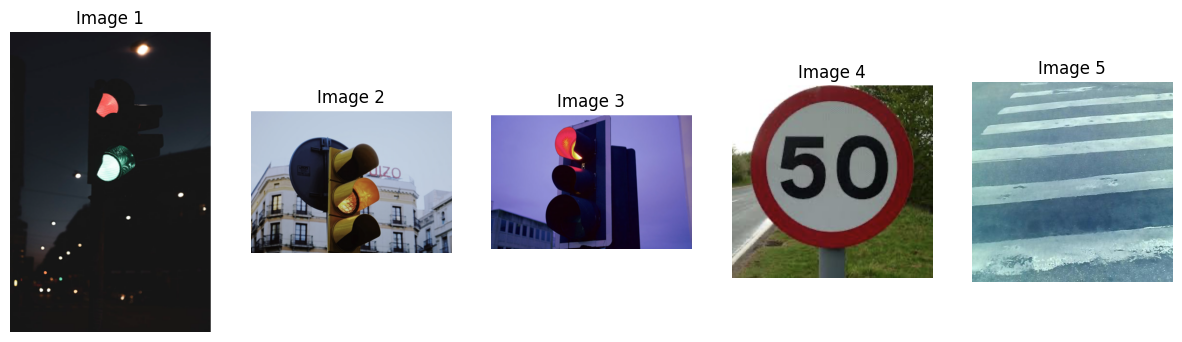

In [9]:
image_files = find_image_files(train_path)

if image_files:
    num_images_to_display = 5  # Set the number of images you want to display
    plt.figure(figsize=(15, 10))  # Adjust the figure size
    
    for idx, image_path in enumerate(image_files[:num_images_to_display]):
        img = Image.open(image_path)
        
        # Add a subplot for each image
        plt.subplot(1, num_images_to_display, idx + 1)
        plt.imshow(img)
        plt.title(f"Image {idx + 1}")
        plt.axis("off")
    plt.show()
else:
    print("No image files found in the specified directory.")

In [10]:
import yaml

class CustomClass:
    def __init__(self):
        self.data_types = ["train","test","val"]
        self.image_paths, self.label_paths = [],[]
        self.bboxes = {}
        self.class_name = self.get_all_class_names()
        self.get_all_image_paths()
        self.get_all_bboxes()

    def get_all_class_names(self):
        with open(f"{HOME}/datasets/dataset.yaml", 'r') as file: 
            data = yaml.safe_load(file)   
        # Extract class namess
        class_names = data['names']
        return class_names
    def get_all_image_paths(self):
        for data_type in self.data_types:
            self.image_paths += glob(f"{HOME}/datasets/{data_type}/images/*")
    def get_all_bboxes(self):
        for idx, image_path in enumerate(self.image_paths):
            if ".png" in image_path: image_path = image_path.replace(".png", ".txt")
            elif ".jpg" in image_path: image_path = image_path.replace(".jpg", ".txt")
            label_path = image_path.replace("images", "labels")
            self.label_paths.append(label_path)
            self.load_label(image_path=image_path, label_path=label_path)
    def load_label(self, image_path, label_path):
        bboxes = []
        with open(label_path, "r") as f:
            for line in f.readlines():
                parts = line.strip().split()
                class_id = int(parts[0])
                bbox = [class_id] + [float(coord) for coord in parts[1:]]
                bboxes.append(bbox)
        self.bboxes[image_path] = bboxes

    def plot(self, rows, cols, count, im_path, bboxes):
        plt.subplot(rows, cols, count)
        img = np.array(Image.open(im_path).convert("RGB"))
        height, width, _ = img.shape
    
        for bbox in bboxes:
            
            class_id, x_center, y_center, w, h = bbox

            # Convert YOLO format to pixel values
            x_min = int((x_center - w / 2) * width)  # x_min
            y_min = int((y_center - h / 2) * height)  # y_min
            x_max = int((x_center + w / 2) * width)  # x_max
            y_max = int((y_center + h / 2) * height)  # y_max
            
            color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
            cv2.rectangle(img = img, pt1 = (x_min, y_min), pt2 = (x_max, y_max), color = color, thickness = 3)
        plt.imshow(img)
        plt.axis("off"); plt.title(f"There are {len(bboxes)} object(s) in the image.")
        
        return count + 1
custom_class = CustomClass()


In [11]:
model = YOLO("yolo11n.pt")

In [ ]:
train_results = model.train(
    data=f"{HOME}/datasets/dataset.yaml",  # path to dataset YAML
    epochs=10,  # number of training epochs
    imgsz=480  # training image size
)

Ultralytics 8.3.68  Python-3.12.8 torch-2.5.1+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
engine\trainer: task=detect, mode=train, model=yolo11n.pt, data=./datasets/dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=480, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show

train: Scanning D:\LapTrinh\ML_Zoomcamp2024\Capstone2\datasets\train\labels.cache... 1263 images, 5 backgrounds, 0 corrupt: 100%|██████████| 1263/1263 [00:00<?, ?it/s]
val: Scanning D:\LapTrinh\ML_Zoomcamp2024\Capstone2\datasets\val\labels.cache... 158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 158/158 [00:00<?, ?it/s]


Plotting labels to runs\detect\train12\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000769, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 480 train, 480 val
Using 0 dataloader workers
Logging results to runs\detect\train12
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.432      3.514      1.071         63        480:  72%|███████▏  | 57/79 [02:47<01:07,  3.05s/it]